<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/SolutionsAss4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Model Selection

## Question 1

a) [5 marks] Best subset selection has the smallest training RSS.
Forward and stepwise selection determine the best $k$ predictor model in a path dependent manner. Therefore they might not arrive at the model that fits the training data best.

b) [5 marks] Best Subset selection should have the smallest test RSS because it considers all possible models and selects the one with lowest cross-validation error (or Adjusted $R^2$ etc...).

c) [10 marks]
i. True. 
ii. True. 
iii. False. 
iv. False. 
v. False.

## Question 3
a) [2 marks] (iv) Steadily decreases. As $s$ increases, the parameters estimates $\beta$ increase from 0
to the values from OLS. Therefore training error decreases to the minimized RSS from OLS.


b) [2marks] (ii) U shape: When $s=0$ and all $\beta=0$, the model is the null model therefore has a high test RSS. As $s$ increases, the estimates of $\beta$ increase and model starts fitting well on test data and so test RSS decreases. Eventually, as the estimated $\beta$ increase to their OLS values, they start overfitting the training data, increasing test RSS.

c) [2marks] (iii) Steadily increase: When $s=0$, the null model has very little variance. The esimates of the constant term would vary little over different samples. As $s$ increases, the models includes more predictors and the estiamtes approach OLS which has relatively large variance.

d) [2marks] (iv) Steadily decrease: When $s=0$, the null model has a lot of bias because it only contains the intercept term. Since this is far from the true model, it is biased (suffers from omitted variable bias). As $s$ increases, and more predictors enter the model, bias is reduced because it approaches the true model. Note that including irrelevant predictors does NOT increase bias.

e) [2marks] (v) Remains constant: By definition, irreducible error is does not depend on the estiamted model, so does not depend on $s$.

## Question 8
a) 5 [marks]

In [ ]:
set.seed(1)
X = rnorm(100)
eps = rnorm(100)

b) [5 marks]

In [ ]:
beta0 = 1
beta1 = 2
beta2 = 3
beta3 = 4

Y = beta0 + beta1*X + beta2*X^2 + beta3*X^3 + eps

c) [5 marks]

In [ ]:
library(leaps)
data.full = data.frame(y = Y, x = X)
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10) # fit up to a 10 degree polyonomial
mod.summary = summary(mod.full)

# Find the model size for best cp, BIC and adjr2
best.Cp <-which.min(mod.summary$cp)
best.BIC <-which.min(mod.summary$bic)
best.aR2 <- which.max(mod.summary$adjr2)

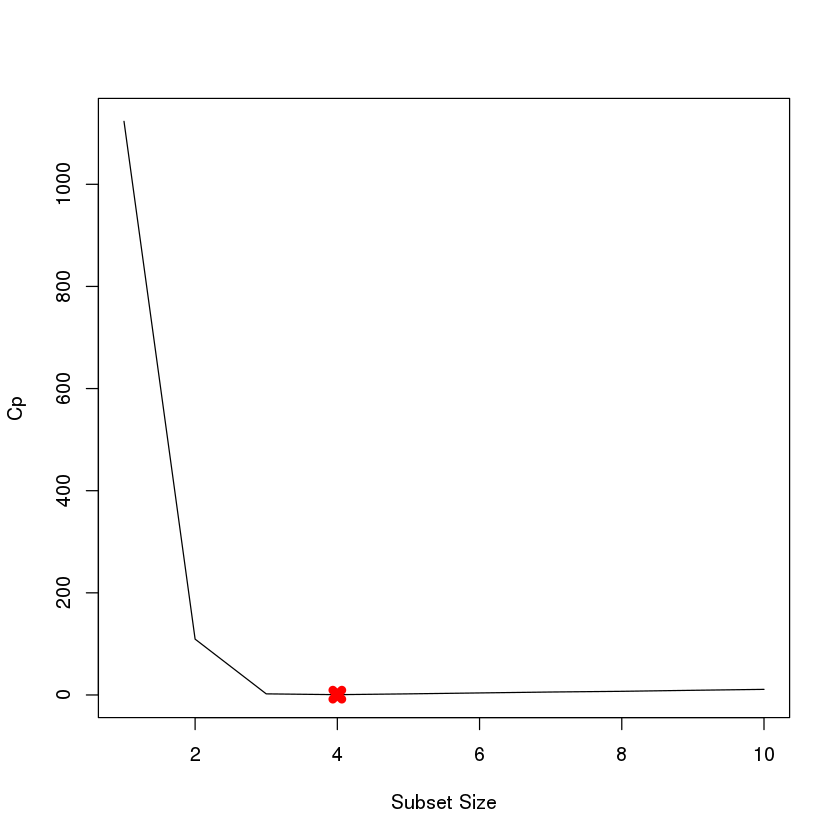

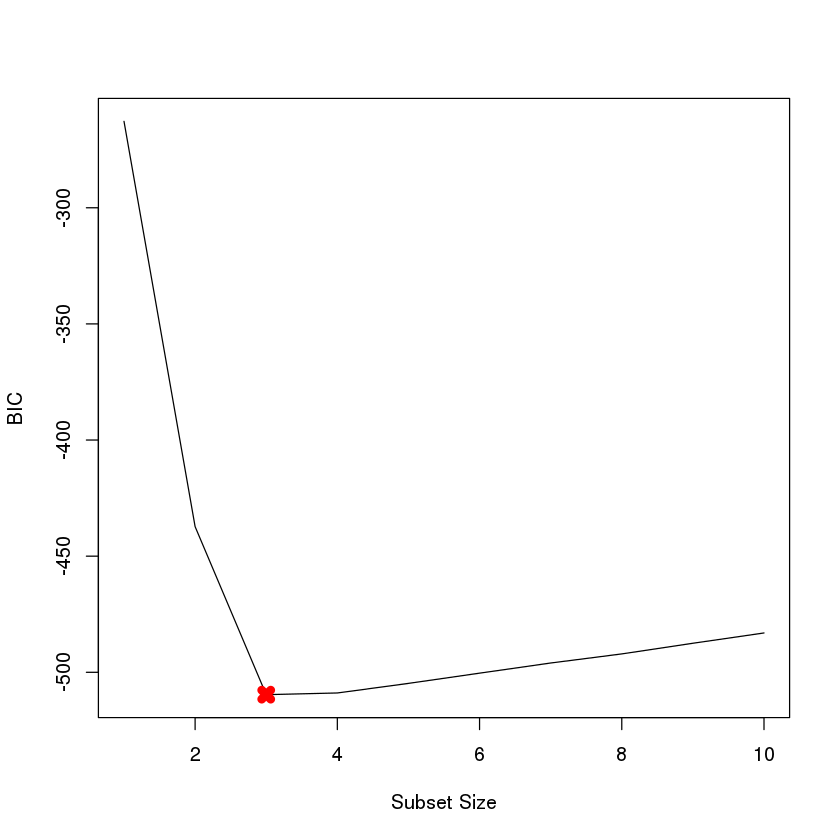

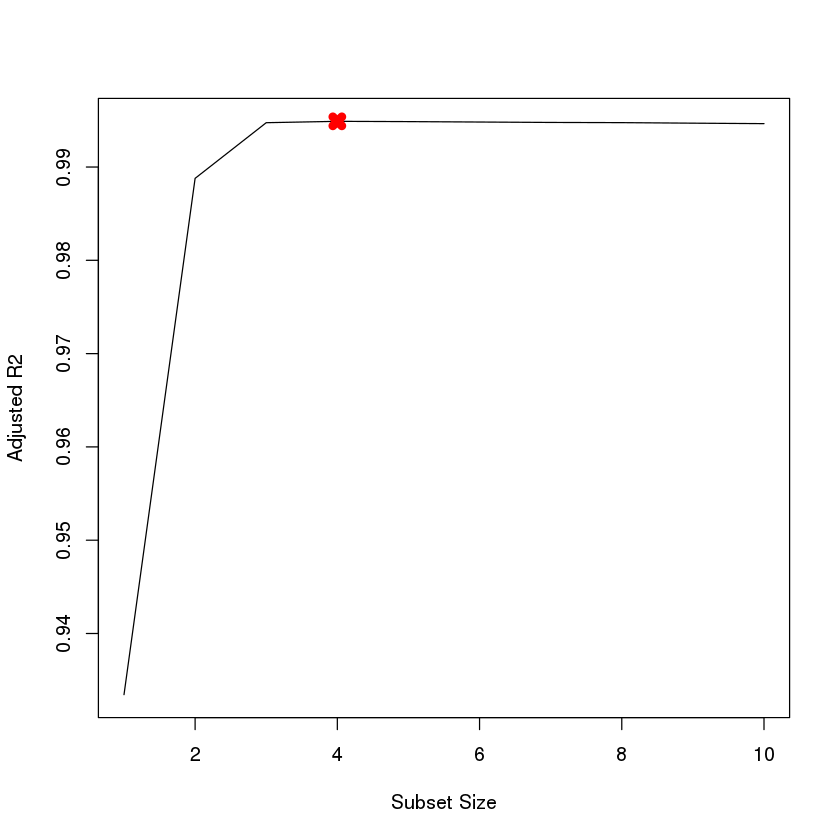

In [ ]:
# Plot cp, BIC and adjr2
plot(mod.summary$cp, xlab = "Subset Size", ylab = "Cp", pch = 20, type = "l")
points(best.Cp, mod.summary$cp[best.Cp], pch = 4, col = "red", lwd = 7)
plot(mod.summary$bic, xlab = "Subset Size", ylab = "BIC", pch = 20, type = "l")
points(best.BIC, mod.summary$bic[best.BIC], pch = 4, col = "red", lwd = 7)
plot(mod.summary$adjr2, xlab = "Subset Size", ylab = "Adjusted R2", pch = 20, 
    type = "l")
points(best.aR2, mod.summary$adjr2[best.aR2], pch = 4, col = "red", lwd = 7)

$C_p$ and adjusted $R^2$ pick the degree 4 polynomial, while BIC picks degree 3. However, even for $C_p$ and adjusted $R^2$ there is little change moving from 3 to 4 predictors. Therefore we can conclude the 3 predictor model is the best model.

In [ ]:
coefficients(mod.full, id = 3)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
             1.061507              1.975280              2.876209 
poly(x, 10, raw = T)3 
             4.017639

d) [5 marks]

In [ ]:
mod.fwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
    method = "forward")
mod.bwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
    method = "backward")
fwd.summary = summary(mod.fwd)
bwd.summary = summary(mod.bwd)

which.min(fwd.summary$cp)
which.min(bwd.summary$cp)
which.min(fwd.summary$bic)
which.min(bwd.summary$bic)
which.max(fwd.summary$adjr2)
which.max(bwd.summary$adjr2)

[1] 4

[1] 4

[1] 3

[1] 3

[1] 4

[1] 4

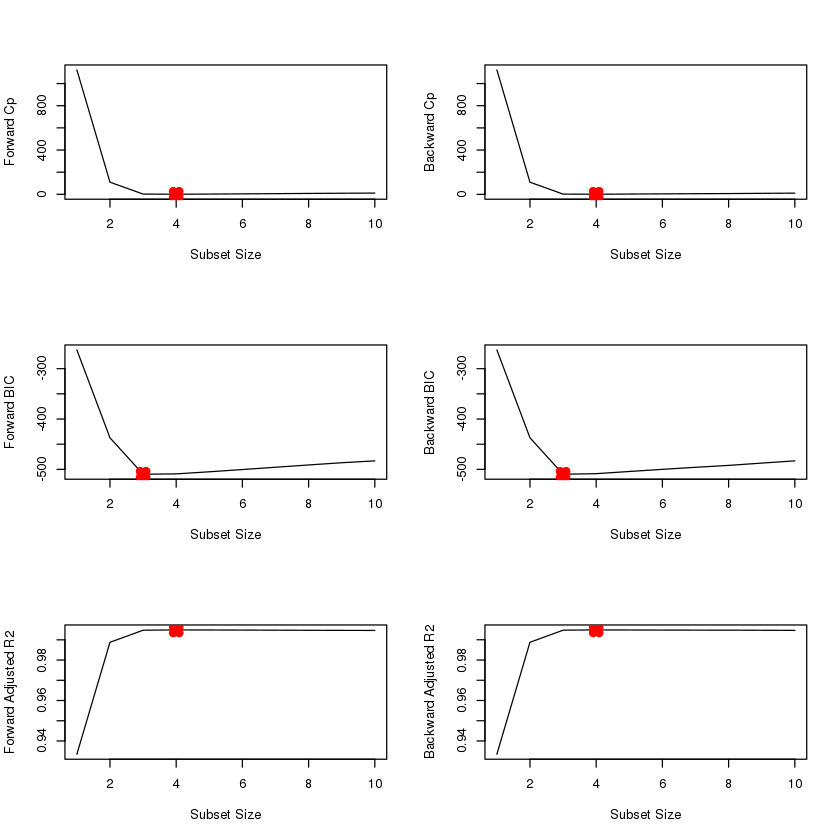

In [ ]:
# Plot the statistics
par(mfrow = c(3, 2))
plot(fwd.summary$cp, xlab = "Subset Size", ylab = "Forward Cp", pch = 20, type = "l")
points(4, fwd.summary$cp[4], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$cp, xlab = "Subset Size", ylab = "Backward Cp", pch = 20, type = "l")
points(4, bwd.summary$cp[4], pch = 4, col = "red", lwd = 7)
plot(fwd.summary$bic, xlab = "Subset Size", ylab = "Forward BIC", pch = 20, 
    type = "l")
points(3, fwd.summary$bic[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$bic, xlab = "Subset Size", ylab = "Backward BIC", pch = 20, 
    type = "l")
points(3, bwd.summary$bic[3], pch = 4, col = "red", lwd = 7)
plot(fwd.summary$adjr2, xlab = "Subset Size", ylab = "Forward Adjusted R2", 
    pch = 20, type = "l")
points(4, fwd.summary$adjr2[4], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$adjr2, xlab = "Subset Size", ylab = "Backward Adjusted R2", 
    pch = 20, type = "l")
points(4, bwd.summary$adjr2[4], pch = 4, col = "red", lwd = 7)

In [ ]:
coefficients(mod.fwd, id = 3)
coefficients(mod.fwd, id = 4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
             1.061507              1.975280              2.876209 
poly(x, 10, raw = T)3 
             4.017639

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           1.07200775            2.38745596            2.84575641 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)5 
           3.55797426            0.08072292

The forward model picks the 3rd degree polynomial using BIC. Using other criteria, it addsthe 5th degree polynomial over the 4th (note this predictor wasn't actually used to generate the data!)

In [ ]:
coefficients(mod.bwd, id = 3)
coefficients(mod.bwd, id = 4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
             1.061507              1.975280              2.876209 
poly(x, 10, raw = T)3 
             4.017639

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
          1.079236362           2.231905828           2.833494180 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)9 
          3.819555807           0.001290827

The backward model picks the 3rd degree polynomial using BIC. But again, using other criteria, it addsthe 5th degree polynomial over the 4th (note this predictor wasn't actually used to generate the data!)

e) [5 marks]

In [ ]:
library(glmnet)

xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]
mod.lasso = cv.glmnet(xmat, Y, alpha = 1) #run cross-validation
best.lambda = mod.lasso$lambda.min
best.lambda

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] 0.07660225

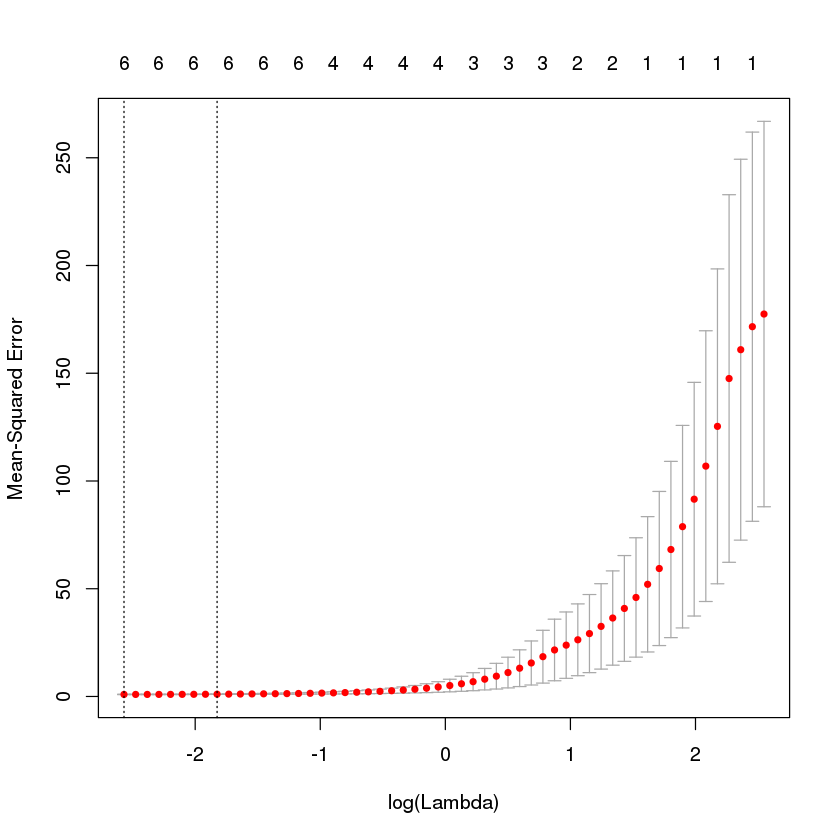

In [ ]:
plot(mod.lasso)

In [ ]:
# Next fit the model on entire data using best lambda
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                                 1
(Intercept)            1.182646169
poly(x, 10, raw = T)1  2.137739131
poly(x, 10, raw = T)2  2.623547995
poly(x, 10, raw = T)3  3.813195738
poly(x, 10, raw = T)4  0.042303133
poly(x, 10, raw = T)5  0.012404464
poly(x, 10, raw = T)6  .          
poly(x, 10, raw = T)7  0.003849104
poly(x, 10, raw = T)8  .          
poly(x, 10, raw = T)9  .          
poly(x, 10, raw = T)10 .          

The LASSO adds the 4th, 5th, and 7th degree polynomials, but with small paramaters values.

e) [5 marks]

In [ ]:
beta7 = 7
Y = beta0 + beta7 * X^7 + eps
# Predict using regsubsets
data.full = data.frame(y = Y, x = X)
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10)
mod.summary = summary(mod.full)

# Find the model size for best cp, BIC and adjr2
which.min(mod.summary$cp)
which.min(mod.summary$bic)
which.max(mod.summary$adjr2)

[1] 2

[1] 1

[1] 4

BIC picks the 1 prdictor modek, while $C_p$ and Adjusted $R^2$ pick larger models

In [ ]:
coefficients(mod.full, id = 1)

(Intercept) poly(x, 10, raw = T)7 
            0.9589402             7.0007705

In [ ]:
coefficients(mod.full, id = 2)

(Intercept) poly(x, 10, raw = T)2 poly(x, 10, raw = T)7 
            1.0704904            -0.1417084             7.0015552

In [ ]:
coefficients(mod.full, id = 4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
            1.0762524             0.2914016            -0.1617671 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)7 
           -0.2526527             7.0091338

In [ ]:
xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]
mod.lasso = cv.glmnet(xmat, Y, alpha = 1)
best.lambda = mod.lasso$lambda.min
best.lambda

[1] 13.57478

In [ ]:
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)            1.904188
poly(x, 10, raw = T)1  .       
poly(x, 10, raw = T)2  .       
poly(x, 10, raw = T)3  .       
poly(x, 10, raw = T)4  .       
poly(x, 10, raw = T)5  .       
poly(x, 10, raw = T)6  .       
poly(x, 10, raw = T)7  6.776797
poly(x, 10, raw = T)8  .       
poly(x, 10, raw = T)9  .       
poly(x, 10, raw = T)10 .       

LASSO gets it right!

## Question 10

a) [2 marks]

In [ ]:
set.seed(1)
p = 20
n = 1000
x = matrix(rnorm(n * p), n, p)
B = rnorm(p)
B[1] = 0
B[2] = 0
B[3] = 0
B[4] = 0
B[5] = 0
eps = rnorm(p)
y = x %*% B + eps

b) [3 marks]

In [ ]:
train = sample(seq(1000), 100, replace = FALSE)
y.train = y[train, ]
y.test = y[-train, ]
x.train = x[train, ]
x.test = x[-train, ]

c) [3 amrks]

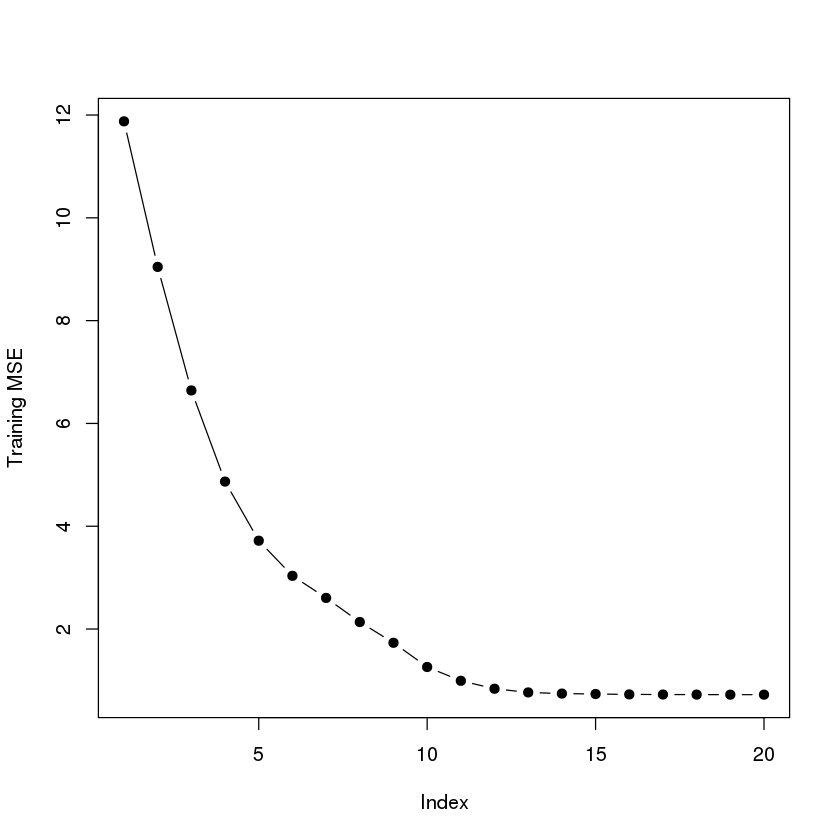

In [ ]:
library(leaps)
regfit.full = regsubsets(y ~ ., data = data.frame(x = x.train, y = y.train), 
    nvmax = p)
val.errors = rep(NA, p)
x_cols = colnames(x, do.NULL = FALSE, prefix = "x.")
for (i in 1:p) {
    coefi = coef(regfit.full, id = i)
    pred = as.matrix(x.train[, x_cols %in% names(coefi)]) %*% coefi[names(coefi) %in% 
        x_cols]
    val.errors[i] = mean((y.train - pred)^2)
}
plot(val.errors, ylab = "Training MSE", pch = 19, type = "b")

d) [3 marks]

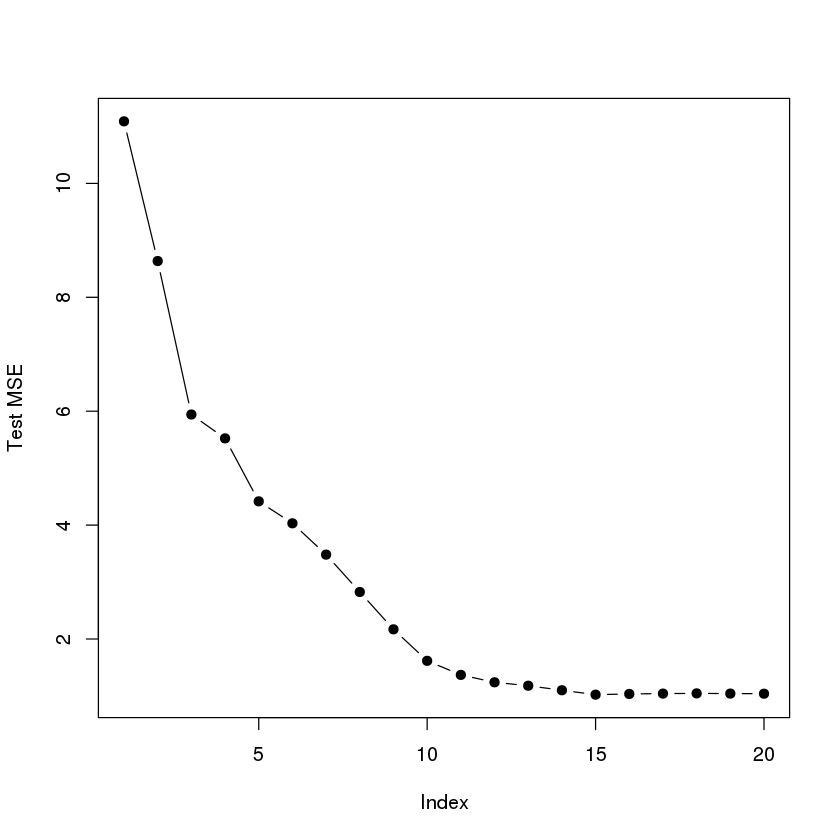

In [ ]:
val.errors = rep(NA, p)
for (i in 1:p) {
    coefi = coef(regfit.full, id = i)
    pred = as.matrix(x.test[, x_cols %in% names(coefi)]) %*% coefi[names(coefi) %in% 
        x_cols]
    val.errors[i] = mean((y.test - pred)^2)
}
plot(val.errors, ylab = "Test MSE", pch = 19, type = "b")

e) [3 marks]

It picks a model with 15 predictors.

In [ ]:
which.min(val.errors)

[1] 15

f) [3 marks]

It is removing the preidctors that are not in the true model.

In [ ]:
coef(regfit.full, id = which.min(val.errors))

(Intercept)         x.6         x.7         x.8         x.9        x.10 
 0.08309626 -0.29565020 -1.51982939  0.78904608  2.01914234  0.64432311 
       x.11        x.12        x.13        x.14        x.15        x.16 
 0.89094347  0.49666187 -0.17736921 -0.72628709 -0.74885196 -0.34613877 
       x.17        x.18        x.19        x.20 
 0.11554722  1.75955107  0.77488037 -1.02047604

g) [3 marks]

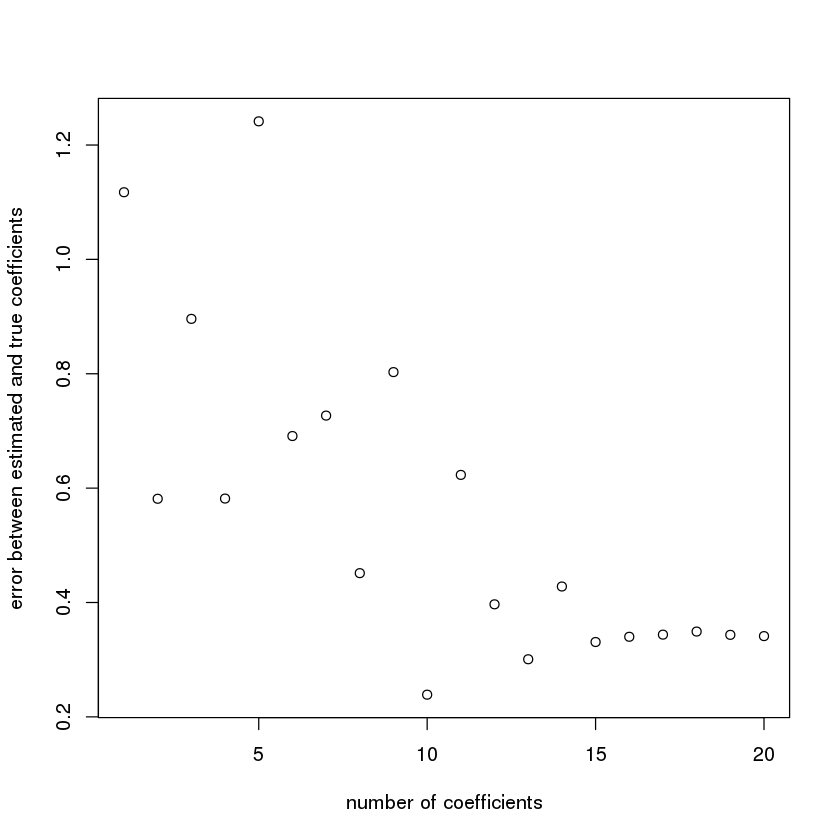

In [ ]:
val.errors = rep(NA, p)
a = rep(NA, p)
b = rep(NA, p)
for (i in 1:p) {
    coefi = coef(regfit.full, id = i)
    a[i] = length(coefi) - 1
    b[i] = sqrt(sum((B[x_cols %in% names(coefi)] - coefi[names(coefi) %in% x_cols])^2) + 
        sum(B[!(x_cols %in% names(coefi))])^2)
}
plot(x = a, y = b, xlab = "number of coefficients", ylab = "error between estimated and true coefficients")

In [ ]:
which.min(b)

[1] 10

The model with 10 coefficients (plus the intercept) minimizes the error between the estimated and true coefficients. Howver in this model, even though the coefficients happen to be close to their true values, it drops some coefficients (perhaps because their true value is small).

Test error, on the other hand, is minimized with 15 parameter model.

A better fit of the coefficients doesn't necessairly mean the model will have a lower test MSE!